# Project Baudet Baligand

## Project Overview
TODO:Intro, problem statement, metrics

## Data Exploration

In [32]:
# Useful modules, make sure you can import them before proceeding further
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import json
import string
import os
import seaborn as sbn
from pandas.io.json import json_normalize

# Random seed to make results reducible
SEED = 1

We need to extract the data, and convert the data given in "json" to a dataframe in order to perform our analysis

In [17]:
my_list = []
with open('amazon_step1.json') as f:
    for line in f:
        my_list.append(json.loads(line))

df = json_normalize(my_list)

In [18]:
df.head(1)

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000J4HXUC,Sports_and_Outdoors,"[1, 1]",5.0,It's a .50 Caliber Ammo Can. That largely sums...,"01 5, 2014",A3QRW0UJPKIAX7,Grant Fritchey,Clean and Exactly as Advertised,1388880000


In [19]:
#Check if we have any null values
print (df.isnull().sum())

asin                0
category            0
helpful             0
overall             0
reviewText          0
reviewTime          0
reviewerID          0
reviewerName      994
summary             0
unixReviewTime      0
dtype: int64


In [20]:
df.describe()

,overall,unixReviewTime
count,96000.000000,9.600000e+04
mean,4.260271,1.333697e+09
std,1.103461,9.034763e+07
min,1.000000,8.827488e+08
25%,4.000000,1.323821e+09
50%,5.000000,1.365898e+09
75%,5.000000,1.388102e+09
max,5.000000,1.406074e+09


96000

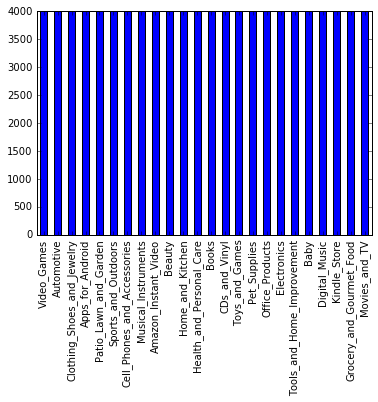

In [22]:
# histogram of categories
fig, ax = plt.subplots()
df['category'].value_counts().plot(ax=ax, kind='bar')
df['category'].value_counts().sum()

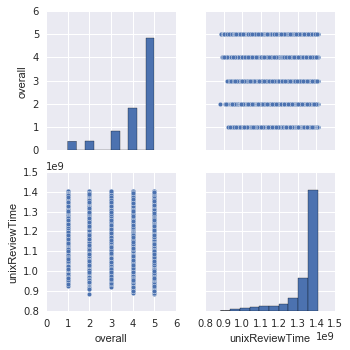

In [24]:
# visualize distribution of features and pairwise relationship using seaborn pairplot
sbn.pairplot(df)

In [25]:
df.corr()

,overall,unixReviewTime
overall,1.000000,0.037631
unixReviewTime,0.037631,1.000000


## Data Pre Processing

We will map the 24 categories to numerical values from 0 to 23.

In [36]:
df['category'] = df['category'].astype('category')

mapper = dict( enumerate(df.category.cat.categories) )
print(mapper)
df['category_encode'] = df['category'].cat.codes
print(df['category_encode'])

{0: 'Amazon_Instant_Video', 1: 'Apps_for_Android', 2: 'Automotive', 3: 'Baby', 4: 'Beauty', 5: 'Books', 6: 'CDs_and_Vinyl', 7: 'Cell_Phones_and_Accessories', 8: 'Clothing_Shoes_and_Jewelry', 9: 'Digital_Music', 10: 'Electronics', 11: 'Grocery_and_Gourmet_Food', 12: 'Health_and_Personal_Care', 13: 'Home_and_Kitchen', 14: 'Kindle_Store', 15: 'Movies_and_TV', 16: 'Musical_Instruments', 17: 'Office_Products', 18: 'Patio_Lawn_and_Garden', 19: 'Pet_Supplies', 20: 'Sports_and_Outdoors', 21: 'Tools_and_Home_Improvement', 22: 'Toys_and_Games', 23: 'Video_Games'}
0        20
1         5
2        11
3         7
4         0
5         3
6        21
7         9
8        19
9        15
10       23
11       14
12       20
13       20
14        7
15       19
16       19
17       22
18       13
19       14
20       13
21        8
22        1
23       12
24        6
25        4
26        4
27       16
28       14
29       15
         ..
95970     6
95971    10
95972    20
95973     6
95974     1
95975   

In [21]:
# adding summary to reviewText
df['reviewText'] = df['summary'] + ' ' + df['reviewText']

In [30]:
# convert text to lowercase
df.loc[:, 'reviewText'] = df['reviewText'].str.lower()

We then build our Tfidf matrix _features_

In [34]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

#create a stemmer
stemmer = SnowballStemmer("english")


#define our own tokenizing function that we will pass into the TFIDFVectorizer. We will also stem the words here.
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

#define the vectorizer
vectorizer = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01)
#fit the vectorizers to the data.
features = vectorizer.fit_transform(df['reviewText'])
features

<96000x762 sparse matrix of type '<class 'numpy.float64'>'
	with 2251423 stored elements in Compressed Sparse Row format>

## Step 1